Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')


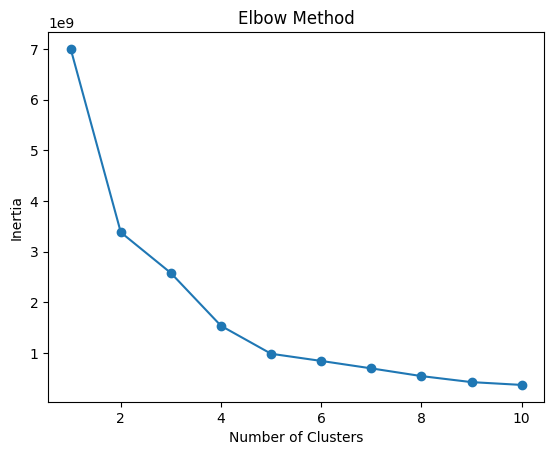

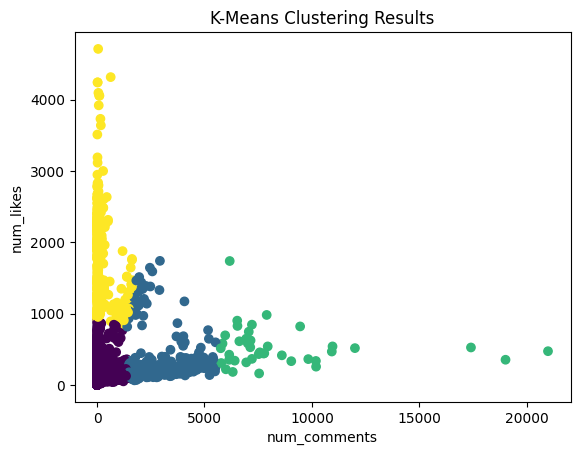

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Live.csv")

# Inspect column names
print(df.columns)

# Replace with actual column names for clustering
X = df[["num_comments", "num_likes"]]

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Elbow Method
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# K-Means with chosen clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=0)
df["cluster"] = kmeans.fit_predict(X)

# Plot clustered data
# Replace "actual_column1" and "actual_column2" with the actual column names from your dataset
# used for clustering, which are "num_comments" and "num_likes" in this case.
plt.scatter(df["num_comments"], df["num_likes"], c=df["cluster"], cmap="viridis")
plt.xlabel("num_comments")
plt.ylabel("num_likes")
plt.title("K-Means Clustering Results")
plt.show()